## **Mounting The Drive To Access Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Installation Of Necessary Packages**

In [ ]:
!pip3 install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Import Necessary Packages**

In [ ]:
import control as co                      # Library For Control Systems
import sklearn as sk                      # Scikit Learn Library For Regression Analysis
import tensorflow as tf                   # Tensorflow's GradientTape to compute derivatives/gradients
import numpy as np                        # Numpy For Matrix Manipulations 
import pandas as pd                       # Pandas To Load Data Into DataFrames
import matplotlib.pyplot as plt           # Matplotlib For Plotting
import scipy as sp                        # Scipy For Function Definitions
import sympy as sym                       # Sympy For Symbolic Mathematics In Python
#import nashpy as nash
#import networkx as nx

## **Read The Data Into DataFrames**

In [ ]:
yarn_purchase = pd.read_excel('/content/drive/MyDrive/BDM/BDM Proofs/Data/processed/GST PURCHASE OF YARN.xlsx')

In [ ]:
yarn_purchase = yarn_purchase[['Date', 'KILO GRAMS', 'RATE', 'VALUE']]

In [ ]:
yarn_purchase.head()

,Date,KILO GRAMS,RATE,VALUE
0,2021-04-05,750.00,229,171750
1,2021-04-09,1800.00,245,441000
2,2021-04-28,1000.00,197,197000
3,2021-05-05,1200.00,195,234000
4,2021-05-05,1935.36,210,406426


In [ ]:
poplin_sales = pd.read_excel('/content/drive/MyDrive/BDM/BDM Proofs/Data/processed/GST SALES OF POPLIN.xlsx')

In [ ]:
poplin_sales = poplin_sales[['Date', 'MTRS', 'RATE', 'Value']]

In [ ]:
poplin_sales.head()

,Date,MTRS,RATE,Value
0,2021-04-01,821.2,46.0,37775.2
1,2021-04-01,2419.2,46.0,111283.2
2,2021-04-01,3235.0,46.0,148810.0
3,2021-04-01,1626.9,46.0,74837.4
4,2021-04-02,1596.6,46.0,73443.6


In [ ]:
debtor_data = pd.read_excel('/content/drive/MyDrive/BDM/BDM Proofs/Data/processed/Debtor Return.xlsx')

In [ ]:
debtor_data.head()

,Particulars,Returned Money,Date of Return
0,JAYARANI JAYAWANI ENTERPRISES,32584.23,2021-04-02
1,JAYARANI JAYAWANI ENTERPRISES,75361.72,2021-04-10
2,JAYARANI JAYAWANI ENTERPRISES,48608.85,2021-04-20
3,JAYARANI JAYAWANI ENTERPRISES,27376.06,2021-04-21
4,JAYARANI JAYAWANI ENTERPRISES,48032.09,2021-05-18


### Yarn Price Forecasting

In [ ]:
#Converting DateTime Object To Fit On X Axis
import datetime
yarn_purchase['Date'] = pd.to_datetime(yarn_purchase.Date, format="%Y-%M-%D")
yarn_purchase['Date'] = yarn_purchase['Date'].map(datetime.datetime.toordinal)
print(yarn_purchase.head())

     Date  KILO GRAMS  RATE   VALUE
0  737885      750.00   229  171750
1  737889     1800.00   245  441000
2  737908     1000.00   197  197000
3  737915     1200.00   195  234000
4  737915     1935.36   210  406426


In [ ]:
from sklearn.linear_model import LinearRegression
Lreg = LinearRegression().fit(yarn_purchase[['Date', 'KILO GRAMS']], yarn_purchase['RATE'])
Lreg.score(yarn_purchase[['Date', 'KILO GRAMS']], yarn_purchase['RATE'])

0.8111555189805426

### Predictor

In [ ]:
def yarn_price_predictor(date_and_weight):
  return Lreg.predict(np.array(date_and_weight).reshape(1,-1))

In [ ]:
yarn_price_predictor([738800, 500])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([471.01601419])

In [ ]:
#Coefficients And Equation
print(Lreg.coef_)
print(Lreg.intercept_)

[0.2982144  0.00514733]
-219852.3555433859


### Our Regression Equation
Yarn_Price = 0.2982144 * date + 0.00514733 * weight - 219852.35543

Text(0.5, 0, 'KILOGRAMS')

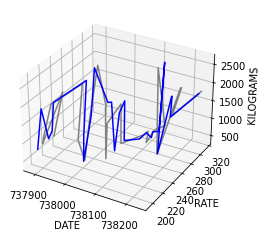

In [ ]:
#Visualization

fig = plt.figure()
ax = plt.axes(projection='3d')
xline = yarn_purchase['Date']
zline = yarn_purchase['KILO GRAMS']
yline = yarn_purchase['RATE']
ax.plot3D(xline, yline, zline, 'gray')
rate_line =  0.2982144 * yarn_purchase['Date'] + 0.00514733 * yarn_purchase['KILO GRAMS'] - 219852.35543
ax.plot3D(yarn_purchase['Date'],rate_line,yarn_purchase['KILO GRAMS'],   'blue')
ax.set_ylabel('RATE')
ax.set_xlabel('DATE')
ax.set_zlabel('KILOGRAMS')

The Regression Line Is An Astonishingly Close Fit !!!
A Better Fit May Be Easily Workable When There Is Even More Data Available
We May Conclude That This Model Is Functional

In [ ]:
poplin_sales['Date'] = poplin_sales['Date'].map(datetime.datetime.toordinal)
debtor_data['Date of Return'] = debtor_data['Date of Return'].map(datetime.datetime.toordinal)
print(poplin_sales.head())

     Date    MTRS  RATE     Value
0  737881   821.2  46.0   37775.2
1  737881  2419.2  46.0  111283.2
2  737881  3235.0  46.0  148810.0
3  737881  1626.9  46.0   74837.4
4  737882  1596.6  46.0   73443.6


In [ ]:
from sklearn.linear_model import LinearRegression
Sreg = LinearRegression().fit(poplin_sales[['Date', 'MTRS']], poplin_sales['RATE'])
Dreg = LinearRegression().fit(debtor_data[['Date of Return']], debtor_data['Returned Money'])
Kreg = LinearRegression().fit(yarn_purchase[['Date', 'RATE']], yarn_purchase['KILO GRAMS'])

In [ ]:
Sreg.coef_

array([ 0.02705822, -0.00031816])

In [ ]:
Sreg.intercept_

-19921.505265947093

In [ ]:
Kreg.coef_

array([-3.38590961, 10.58710269])

In [ ]:
Kreg.intercept_

2497678.446753463

Text(0.5, 0, 'MTRS')

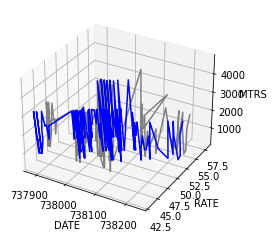

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xline = poplin_sales['Date']
zline = poplin_sales['MTRS']
yline = poplin_sales['RATE']
ax.plot3D(xline, yline, zline, 'gray')
rate_line =  0.02705822 * poplin_sales['Date'] + -0.00031816 * poplin_sales['MTRS'] -19921.505265947093
ax.plot3D(poplin_sales['Date'],rate_line,poplin_sales['MTRS'],   'blue')
ax.set_ylabel('RATE')
ax.set_xlabel('DATE')
ax.set_zlabel('MTRS')

In [ ]:
#Max And Min of Rate
#rmax, rmin = np.max(yarn_purchase['RATE']), np.min(yarn_purchase['RATE'])
mmax, mmin = int(np.max(poplin_sales['MTRS'])), int(np.min(poplin_sales['MTRS']))
kmax, kmin = int(np.max(yarn_purchase['KILO GRAMS'])), int(np.min(yarn_purchase['KILO GRAMS']))

In [ ]:
print(mmax, mmin, kmax, kmin)

## Control System Implementation
#### Randomly initialized State Space Matrices Will Be Updated Via Gradient Descent
#### Two State Space Systems Will Be Developed - One For Predictive Control From The Business' Perspective And Another To Model Bad Debtor Data

In [ ]:
# Financial Year Start And End

import datetime
fyear_start = datetime.date(year=2021, month=4, day=1).toordinal()
fyear_end   = datetime.date(year=2022, month=3, day=31).toordinal()
print(fyear_start, fyear_end)
timeline = list(range(fyear_start, fyear_end+1))
len(timeline)

In [ ]:
SysA = np.random.normal(75, size=(3,3))
InpB = np.random.normal(10, size=(3,3))
OutC = np.random.normal(200, size=(3,3))
FdbD = np.random.normal(50, size=(3,3))

In [ ]:
Xd = np.random.normal(10, size=(3,1))
X = np.random.normal(35, size=(3,1))
I = np.random.normal(23, size=(3,1))

In [ ]:
print(SysA, InpB, OutC, FdbD, Xd)

## State Variable Parameters
Control Input = Yarn Purchase In Kilograms

State Variables = Yarn Price, Current Expected Sales, Predicted Losses

In [ ]:
n_iter = 100
eta0 = 0.01
from random import randint
for j in range(n_iter):
    for i in range(fyear_start, fyear_end+1):
      error = np.subtract(Xd, 
                    np.matmul(SysA, np.array([
                        Lreg.predict( np.array([i, randint(kmin, kmax)]).reshape(1,-1) ),
                        Sreg.predict( np.array([i, randint(mmin, mmax)]).reshape(1,-1) ),
                        Dreg.predict( np.array(i).reshape(1,-1) )
                                          ])
                         ) 
                    + 
                    np.matmul(InpB, np.array([[randint(kmin, kmax)],[0],[0]]))
      )
      Xd = Xd - eta0 * error



In [ ]:
print(Xd)

In [ ]:
mysystem = co.ss(SysA, InpB, OutC, FdbD)

In [ ]:
mysystem

In [ ]:
mag, phase, omega = mysystem.frequency_response([1])

In [ ]:
print(mag)

In [ ]:
print(phase)

In [ ]:
print(omega)

In [ ]:
mag.shape

In [ ]:
mysystem.getitem(0)

In [ ]:
x = co.forced_response(mysystem, T=[10,11,12])
x[1]